# STEPS AND TASK

### Part A: K-Means Clustering (Unsupervised Learning)

**1. Data Understanding & Exploration:**

In [1]:
import numpy as np
import pandas as pd

In [2]:
car_name = pd.read_csv('Car name.csv')
df1 = car_name.copy()

In [3]:
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
car_attributes = pd.read_json('Car-Attributes.json')
df2 = car_attributes.copy()

In [5]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
# we can use either concat or join for merging two dataframes
#df = pd.concat([df1,df2],axis=1)
df = df1.join(df2)

In [7]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df.shape

(398, 9)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Observations:<br>
* The range of MPG(miles per gallon) is from 9 to 46.6
* Average amount of cars have mpg value as 23.5 and have 5 cylinders
* 75% of the cars have mpg value as 29 and have 8 cylinders
* The range of the displacement of the cars is from 68 to 455
* 75% of the cars have displacement of 262
* The range of the weights of the cars is from 1613 to 5140
* Average amount of cars have weight as 2970.42
* 75% of cars have weight as 360
* The range of the acceleration of the cars is from 8 to 24.8
* 75% of the cars have acceleration of 262
* The years at which the cars were manufactured are in the range of 1970 to 1982
* 50% of the cars were manufactured at the year of 1976
* The maximum origin of the cars is 3 and the minimum origin of the cars is 1
* 75% of the cars have origin as 2

**2. Data Preparation & Analysis**

In [10]:
(df.isna().sum()/len(df))*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

Observatons:<br>
* We can say that there no null values present for each of the columns

In [11]:
df.duplicated().sum()

0

Observations:<br>
The dataframe does not contain any duplicate values

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

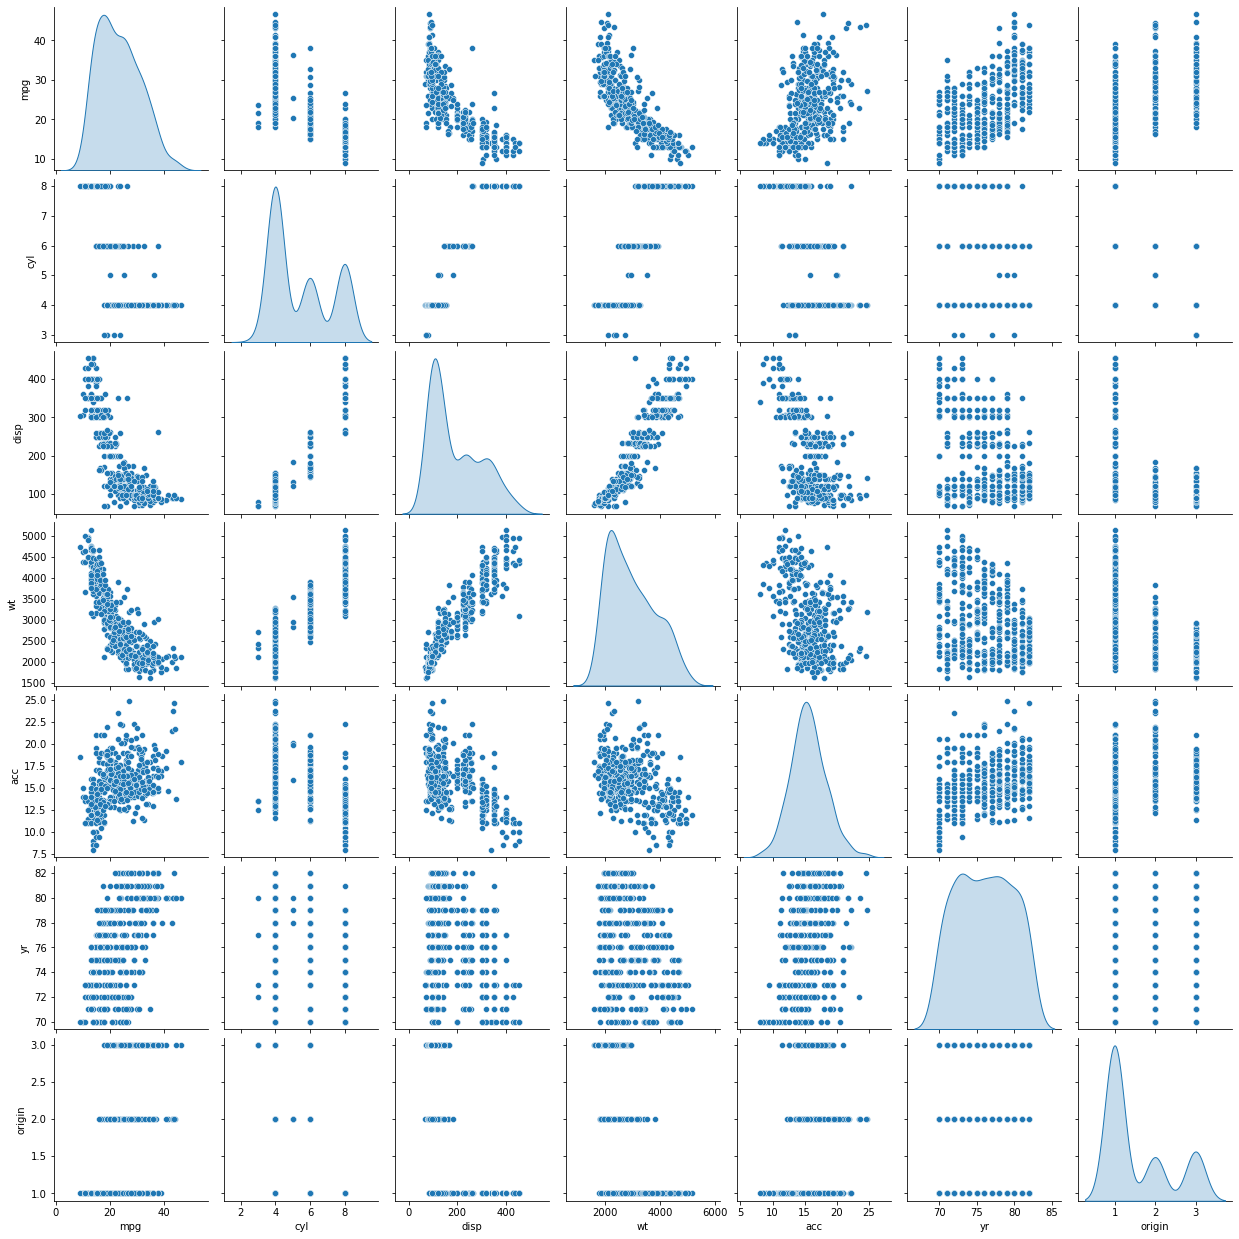

In [13]:
sns.pairplot(df,diag_kind='kde');

Observations:<br>
* Acceleration looks like a normal distribution
* mpg and weight looks nearly like a normal distribution
* Horse power has postive linear relationship with displacement and weight
* mpg has negative linear relationship with displacement, horse power and weight
* mpg has no relation with acceleration

**D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]**

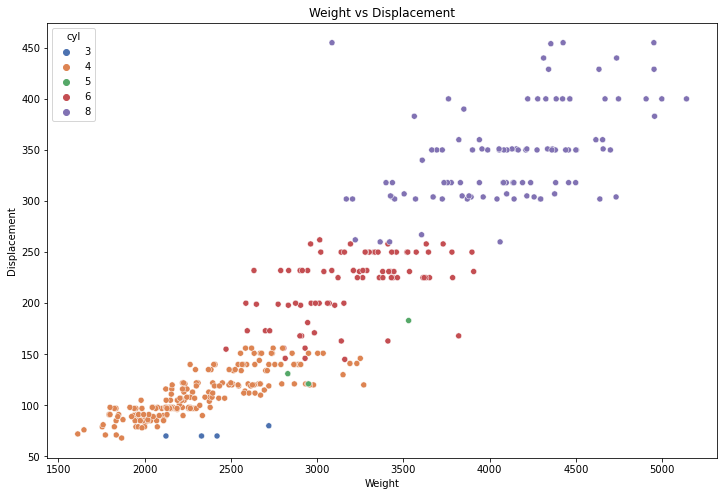

In [14]:
plt.figure(figsize=(12,8))
plt.xlabel("Weight")
plt.ylabel("Displacement")
plt.title("Weight vs Displacement")
sns.scatterplot(data=df, x='wt',y='disp',hue='cyl',palette="deep");

Observations:<br>
* Weights and displacement have a positive linear relationship
* Cars having 8 cylinders have the maximum weight and displacement
* Whereas cars with 3 and 4 cylinders have minimum weight and displacement

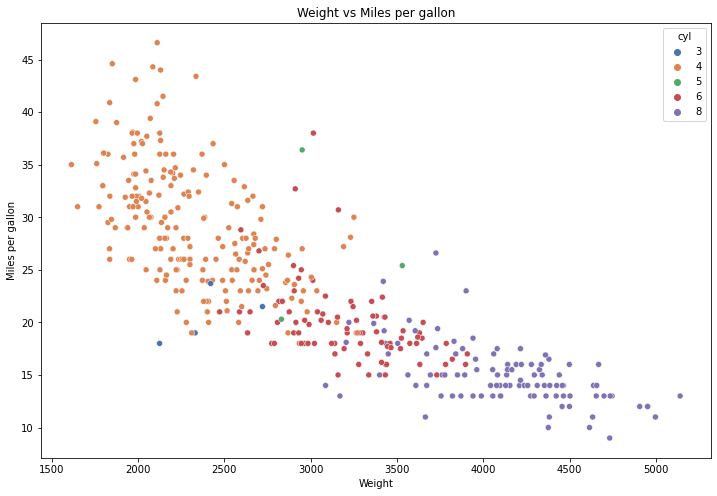

In [15]:
plt.figure(figsize=(12,8))
plt.xlabel("Weight")
plt.ylabel("Miles per gallon")
plt.title("Weight vs Miles per gallon")
sns.scatterplot(data=df,x='wt',y='mpg',hue='cyl',palette="deep");

Observations:<br>
* Weights and miles per gallon have a negative linear relationship
* We can say that cars having  minimum weight has the maximum mpg
* Cars having 4 cylinders have a lesser weight and a higher mpg
* Whereas cars with 8 cylinders have maximum weight and minimum mpg

In [16]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Observation:<br>
hp is of object datatype but it has numerical values

In [18]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

Observation:<br>
There is an additional value '?' in the dataset

In [19]:
#replace ? with nan 
df = df.replace('?',np.nan)

In [20]:
#convert column hp from object datatype to float
df['hp'].astype(float)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 398, dtype: float64

In [21]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [22]:
df[df['hp'].isna()]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


Observations:<br>
* There are 6 missing values in hp column
* Dropping those 6 rows can lead to loss of information
* Therefore we will impute those missing values with median

In [23]:
#replace nan with median
df['hp'].replace(np.nan, df['hp'].median(),inplace=True)

In [24]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

**3. Clustering:** 

**Apply K-Means clustering for 2 to 10 clusters.**

In [25]:
df = df.drop(columns=['car_name'],axis=1)

In [26]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist #used for finding the optimal point
clusters = range(2,11)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df)
    prediction = model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df,model.cluster_centers_,'euclidean'), axis=1)) / df.shape[0])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

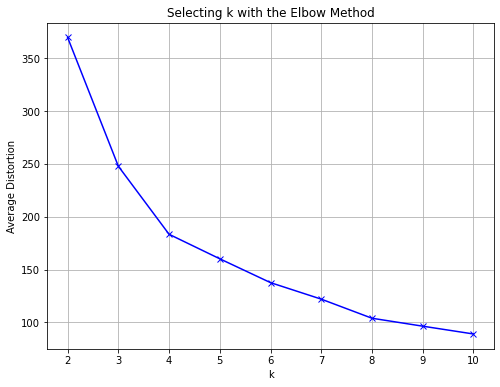

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method');

Observation:<br>
The optimal point is at K=3 or at K=4

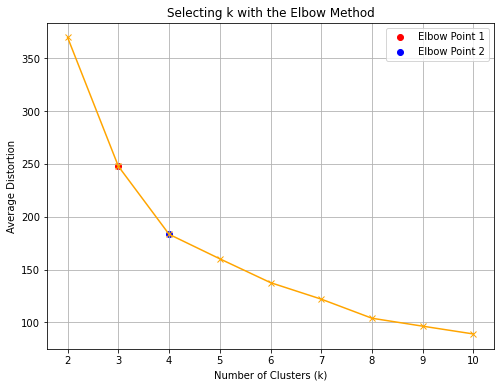

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(clusters, meanDistortions, 'x-',color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')

# Add markers at possible elbow points
plt.scatter(3, meanDistortions[1], c='red', marker='o', label='Elbow Point 1') 
# 3 represents the cluster, K =3
# meanDistortion[1] represents the index position of the average distortion
plt.scatter(4, meanDistortions[2], c='blue', marker='o', label='Elbow Point 2')
plt.grid(True)
plt.legend()
plt.show()

Observation:<br>
The optimal elbow points can be at K=3 or at K=4

In [29]:
#using silhouette score: Higher the value, better the cluster
from sklearn.metrics import silhouette_score

# create a list for different values of K
n_clusters = [3, 4]

# use 'for' loop to build the clusters
# 'random_state' creates the sample in the same order 
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 1)
    predict = cluster.fit_predict(df)
    score = silhouette_score(df, predict, random_state= 1)
    print ("For k =",K,",the silhouette score is", score)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 3 ,the silhouette score is 0.5859933440062476


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For k = 4 ,the silhouette score is 0.5792064603188848


Observations:<br>
* For k=3, the silhouette score is 0.586
* For k=4, the silhouette score is 0.579
* Since cluster 3 has silhouette score slightly greater than cluster 4 we shall consider cluster 3(k = 3) as the optimal point 

In [30]:
# K=3
final_model = KMeans(3,random_state=1)
final_model.fit(df)
prediction = final_model.predict(df)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
df['Group'] = prediction
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,2
6,14.0,8,454.0,220.0,4354,9.0,70,1,2
7,14.0,8,440.0,215.0,4312,8.5,70,1,2
8,14.0,8,455.0,225.0,4425,10.0,70,1,2
9,15.0,8,390.0,190.0,3850,8.5,70,1,2


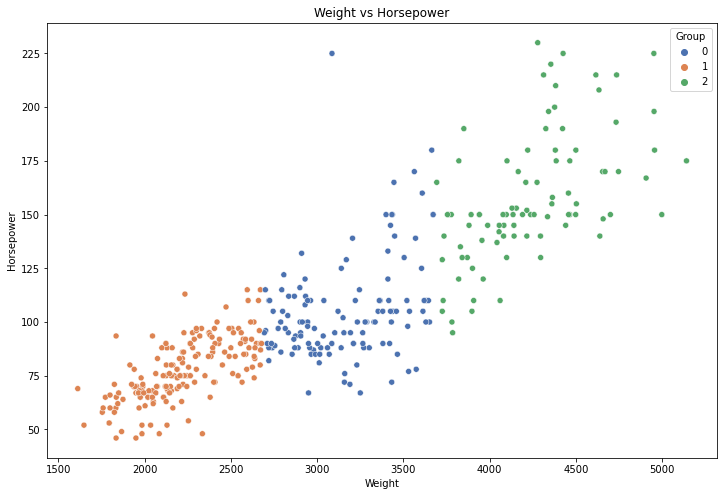

In [32]:
plt.figure(figsize=(12,8))
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.title("Weight vs Horsepower")
sns.scatterplot(data=df,x='wt',y='hp',hue='Group',palette="deep");

**Passing a new DataPoint and predict which cluster it belongs to.**

In [33]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Group
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [34]:
from sklearn.impute import SimpleImputer
# Step 1: Create a new data point
new_data_point = {
    'mpg': 20.0,
    'cyl': 6,
    'disp': 100.0,
    'hp': 90.0,
    'wt': 2500,
    'acc': 15.0,
    'yr': 70,
    'origin': 1
}

# Step 2:Store this new data point to our new dataset
new_data_series = pd.Series(new_data_point)
# Append the new data point to the Dataset and reset the index
df = df.append(new_data_series, ignore_index=True)

# Step 3: convert the dictionary to a list and store only the values and leave out the key
new_data_point = list(new_data_point.values())

#Step 4: convert the list to numpy arary
new_data_point = np.array([new_data_point])

# predict at which cluster the new datapoint belongs to
predicted_cluster = final_model.predict(new_data_point)
print("The new datapoint belongs to cluster", predicted_cluster)

# add the predicted cluster value in th newly added row
df.loc[398,'Group'] = predicted_cluster[0]

The new datapoint belongs to cluster [1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


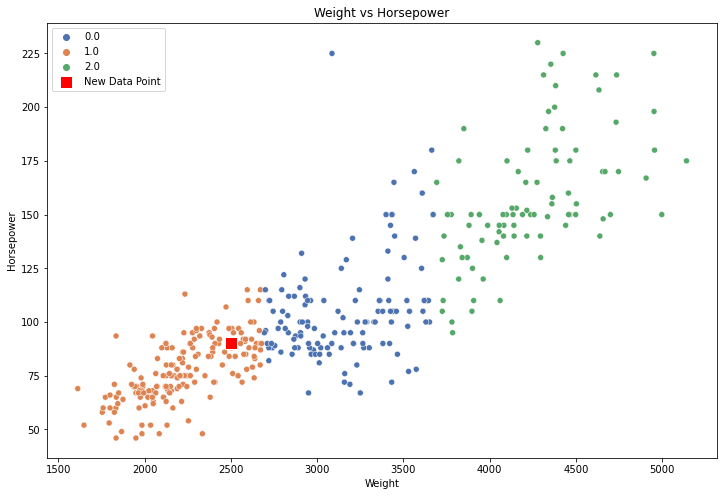

In [35]:
plt.figure(figsize=(12, 8))
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.title("Weight vs Horsepower")

# Create the main scatter plot for the original data
sns.scatterplot(data=df, x='wt', y='hp', hue='Group', palette="deep")

# Get the data point at index 398
new_data_point = df.loc[398]

# Mark the new data point with a red 'x'
sns.scatterplot(x=[new_data_point['wt']], y=[new_data_point['hp']], color='red', marker='s', s=150, label='New Data Point')

# Display the legend
plt.legend()
# Show the plot
plt.show()

Observation:<br>
The new data point falls in group 1

### Part B: PCA + SVM Classification (Supervised Learning)

**STEPS AND TASK**

**1. Data Understanding & Cleaning**

In [6]:
vehicle = pd.read_csv('vehicle.csv')
Df = vehicle.copy()

In [7]:
Df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [8]:
Df.shape

(846, 19)

In [9]:
(Df.isnull().sum()/len(Df))*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [10]:
# imputing nan values with median
for i in Df.columns.values:
    if Df[i].dtype != object:
        Df[i].replace(np.nan, Df[i].median(),inplace=True)

C:\Users\gesiv\AppData\Local\Temp\ipykernel_25268\2647601918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Df[i].replace(np.nan, Df[i].median(),inplace=True)
C:\Users\gesiv\AppData\Local\Temp\ipykernel_25268\2647601918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
(Df.isnull().sum()/len(Df))*100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

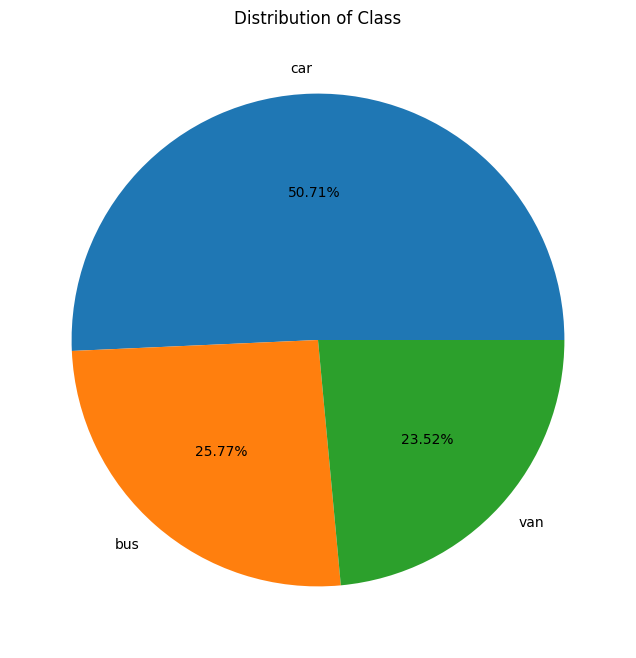

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
x = Df['class'].value_counts()
l = Df['class'].value_counts().index
plt.pie(x, labels = l, autopct='%0.2f%%')
plt.title('Distribution of Class');

Observations:<br>
Car has a maximum distribution of 50.71% whereas bus and van have 25.77% and 23.52% distribution respectively

In [14]:
Df.duplicated().sum()

np.int64(0)

Observations:<br>
The dataset does not have any duplicate values

**2. Data Preparation**

In [35]:
X = Df.drop('class',axis=1)
y = Df['class']

In [36]:
# Standardize the data using z-score
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.20, random_state=1, stratify=y)

**3. Model Building**

**Train a base Classification model using SVM.**

In [39]:
from sklearn.svm import SVC

model_svm = SVC(random_state=1)
model_svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [42]:
#Classification matrix for the whole data
y_pred_svm = model_svm.predict(X_test)
from sklearn.metrics import classification_report

print("Classification  Report for the whole dataset data:\n",classification_report(y_test,y_pred_svm))

Classification  Report for the whole dataset data:
               precision    recall  f1-score   support

         bus       0.98      0.95      0.97        44
         car       0.98      0.94      0.96        86
         van       0.84      0.93      0.88        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



Observations:<br>
* The model has an overall accuracy of 94%.
* Bus and car have precision of 98% whereas van have 84%
* Bus, car and van have recall of 95%, 94%, and 93% respectively
* Bus, car and van have f1-score of 97%, 96%, and 88% respectively
* The model has high accuracy and works well on the whole dataset

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(X_train)

,n_components,10
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


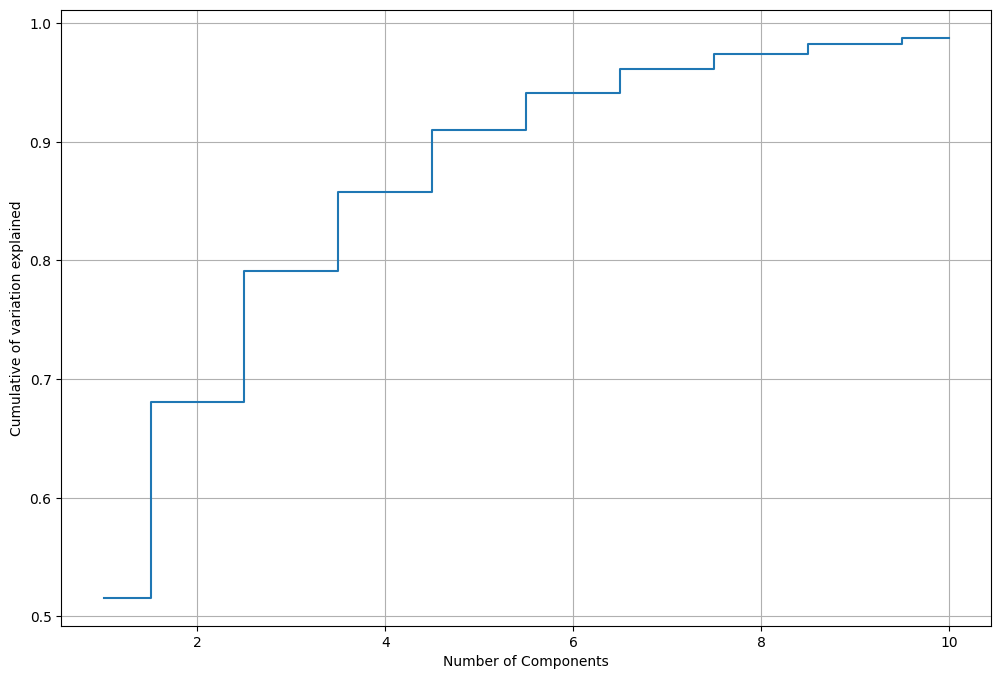

In [44]:
plt.figure(figsize=(12,8))
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of variation explained')
plt.xlabel('Number of Components')
plt.grid(True)
plt.show()

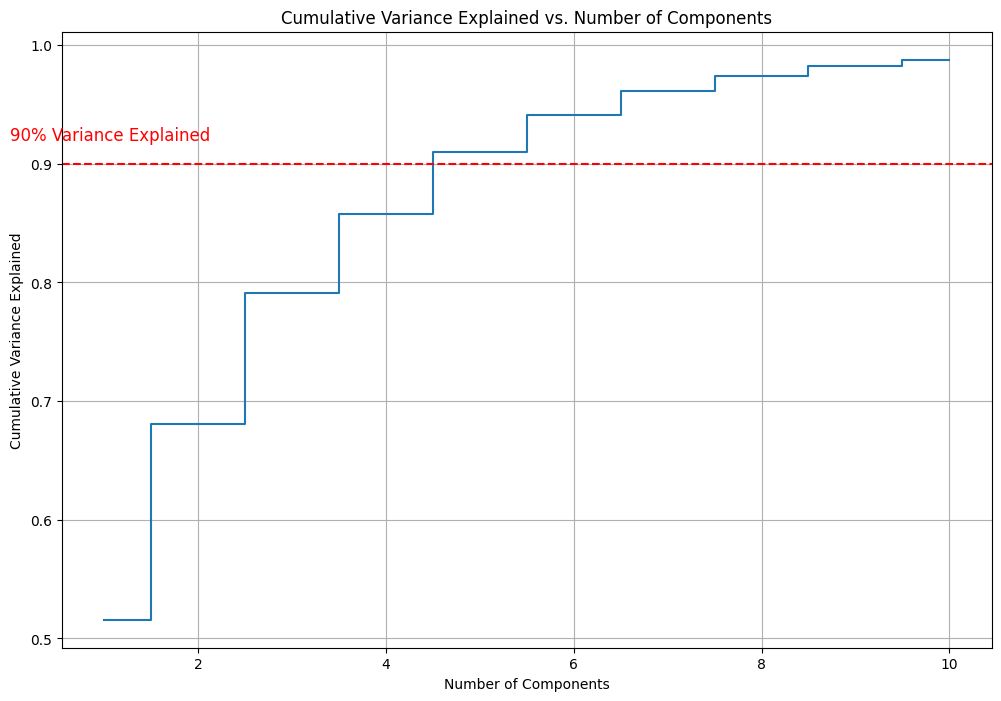

In [45]:
plt.figure(figsize=(12, 8))
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_),where='mid')
# Add a horizontal line at 0.90 on y axis
plt.axhline(y=0.90, color='r', linestyle='--')
# Add a label for the horizontal line
plt.text(0, 0.92, '90% Variance Explained', color='red', fontsize=12, horizontalalignment='left')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained vs. Number of Components")
plt.grid()
plt.show()

Observations:<br>
With 4 variables we can explain 90% of the variance of the data

In [46]:
pca4 = PCA(n_components=4, random_state=1)
X_train_pca = pca4.fit_transform(X_train)
# transform the data
X_test_pca = pca4.transform(X_test)

**Train SVM model on components selected from above step.**

In [47]:
model_svm_pca = SVC(random_state=1)
model_svm_pca.fit(X_train_pca, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [48]:
#Classification matrix for the whole data
y_pred_svm_pca = model_svm_pca.predict(X_test_pca)
from sklearn.metrics import classification_report

print("Classification  Report for the whole dataset data:\n",classification_report(y_test, y_pred_svm_pca))

Classification  Report for the whole dataset data:
               precision    recall  f1-score   support

         bus       0.89      0.70      0.78        44
         car       0.80      0.85      0.82        86
         van       0.66      0.72      0.69        40

    accuracy                           0.78       170
   macro avg       0.78      0.76      0.77       170
weighted avg       0.79      0.78      0.78       170



Observations:<br>
* The model has an overall accuracy of 78%.
* Bus and car have precision of 89% and 80% respectively whereas van have less precison of 66%
* Car has recall of 85% whereas bus has less recall of 70% and van has recall of 72% 
* Bus, car and van have f1-score of 78%, 82%, and 69% respectively
* Reducing the dimensionality of the data by applying PCA has led to loss of information in classification performance 

**4. Performance Improvement**

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#Initalizing the grid search parameters
grid_params = {
    'C': [0.01, 0.1, 1, 10],      # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.1, 1, 5] }

In [51]:
gs = GridSearchCV(SVC(random_state=1), grid_params, cv=5, n_jobs = -1)

In [52]:
gs = gs.fit(X_train, y_train)

In [53]:
#using best_params_ we can get the best parameters for our knn model
best_hyperparams = gs.best_params_
print("Best Hyperparameters:", best_hyperparams)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [56]:
# use the best hyperparameters
svm_gs = SVC(kernel='rbf',C=10,gamma=0.1)
svm_gs.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Observations:<br>\
Best Hyperparameters:<br>
* Regularization parameter(C): 10
* gamma : 0.1
* kernel type: rbf(Radial Basis Function)

In [57]:
#Classification matrix for the whole data
y_pred_svm_gs = svm_gs.predict(X_test)
from sklearn.metrics import classification_report

print("Classification  Report for the whole dataset data:\n",classification_report(y_test, y_pred_svm_gs))

Classification  Report for the whole dataset data:
               precision    recall  f1-score   support

         bus       1.00      0.95      0.98        44
         car       0.99      0.98      0.98        86
         van       0.91      0.97      0.94        40

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



Observations:<br>
After tuning the model with best hyperparameter:<br>
* The model's overall accuracy has increased to 97% from 94%.
* The precision of bus and car have increased to 100% and 99% from 98% respectively and similarly the precision of van increased to 91% from 84%
* The recall of the bus, car and van have increased to 95%, 98% and 97% from 95%, 94% and 93% respectively. <br>
* The f1-score of bus, car and van have increased to 98%, 98% and 94% from 97%, 96% and 88% respectively.<br>
The performace of svm model has improved after tuning

In [58]:
import pickle

# Save model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_gs, file)